In [1]:
import proplot as plot
import numpy as np
import yaml

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
import sys

import pizza_cutter

logging.basicConfig(stream=sys.stdout)
for code in ["ngmix", "metadetect", "pizza_cutter", "pizza_cutter_sims"]:
    logging.getLogger(code).setLevel(
        getattr(logging, "DEBUG_PLOT"))

In [22]:
from pizza_cutter_sims.sim import generate_sim
from pizza_cutter_sims.constants import PIXEL_SCALE

rng = np.random.RandomState(seed=10)
gal_rng = np.random.RandomState(seed=42)

with open("../runs/run0008_wcs-d_gals-bg_msk-None_coadd-2/config.yaml") as fp:
    cfg = yaml.safe_load(fp.read())

data = generate_sim(
    rng=rng,
    gal_rng=gal_rng,
    coadd_config=cfg["coadd"],
    se_config=cfg["se"],
    psf_config=cfg["psf"],
    gal_config=cfg["gal"],
    layout_config=cfg["layout"],
    msk_config=cfg["msk"],
    shear_config=cfg["shear"],
)

DEBUG:pizza_cutter_sims.wcs:generated wcs: galsim.AffineTransform(0.263, 0.0, 0.0, 0.263, origin=galsim.PositionD(x=206.78159213659688, y=205.00733250968761), world_origin=galsim.PositionD(x=0.0, y=0.0))
DEBUG:pizza_cutter_sims.wcs:generated wcs: galsim.AffineTransform(0.263, 0.0, 0.0, 0.263, origin=galsim.PositionD(x=204.51184479898373, y=206.03657679015734), world_origin=galsim.PositionD(x=0.0, y=0.0))
DEBUG:pizza_cutter_sims.psf:psf config: {'type': 'Gaussian', 'fwhm': 0.9, 'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}
DEBUG:pizza_cutter_sims.psf:galsim psf: galsim.Gaussian(sigma=0.3821948101296086)
DEBUG:pizza_cutter_sims.psf:psf config: {'type': 'Gaussian', 'fwhm': 0.9, 'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}
DEBUG:pizza_cutter_sims.psf:galsim psf: galsim.Gaussian(sigma=0.3821948101296086)


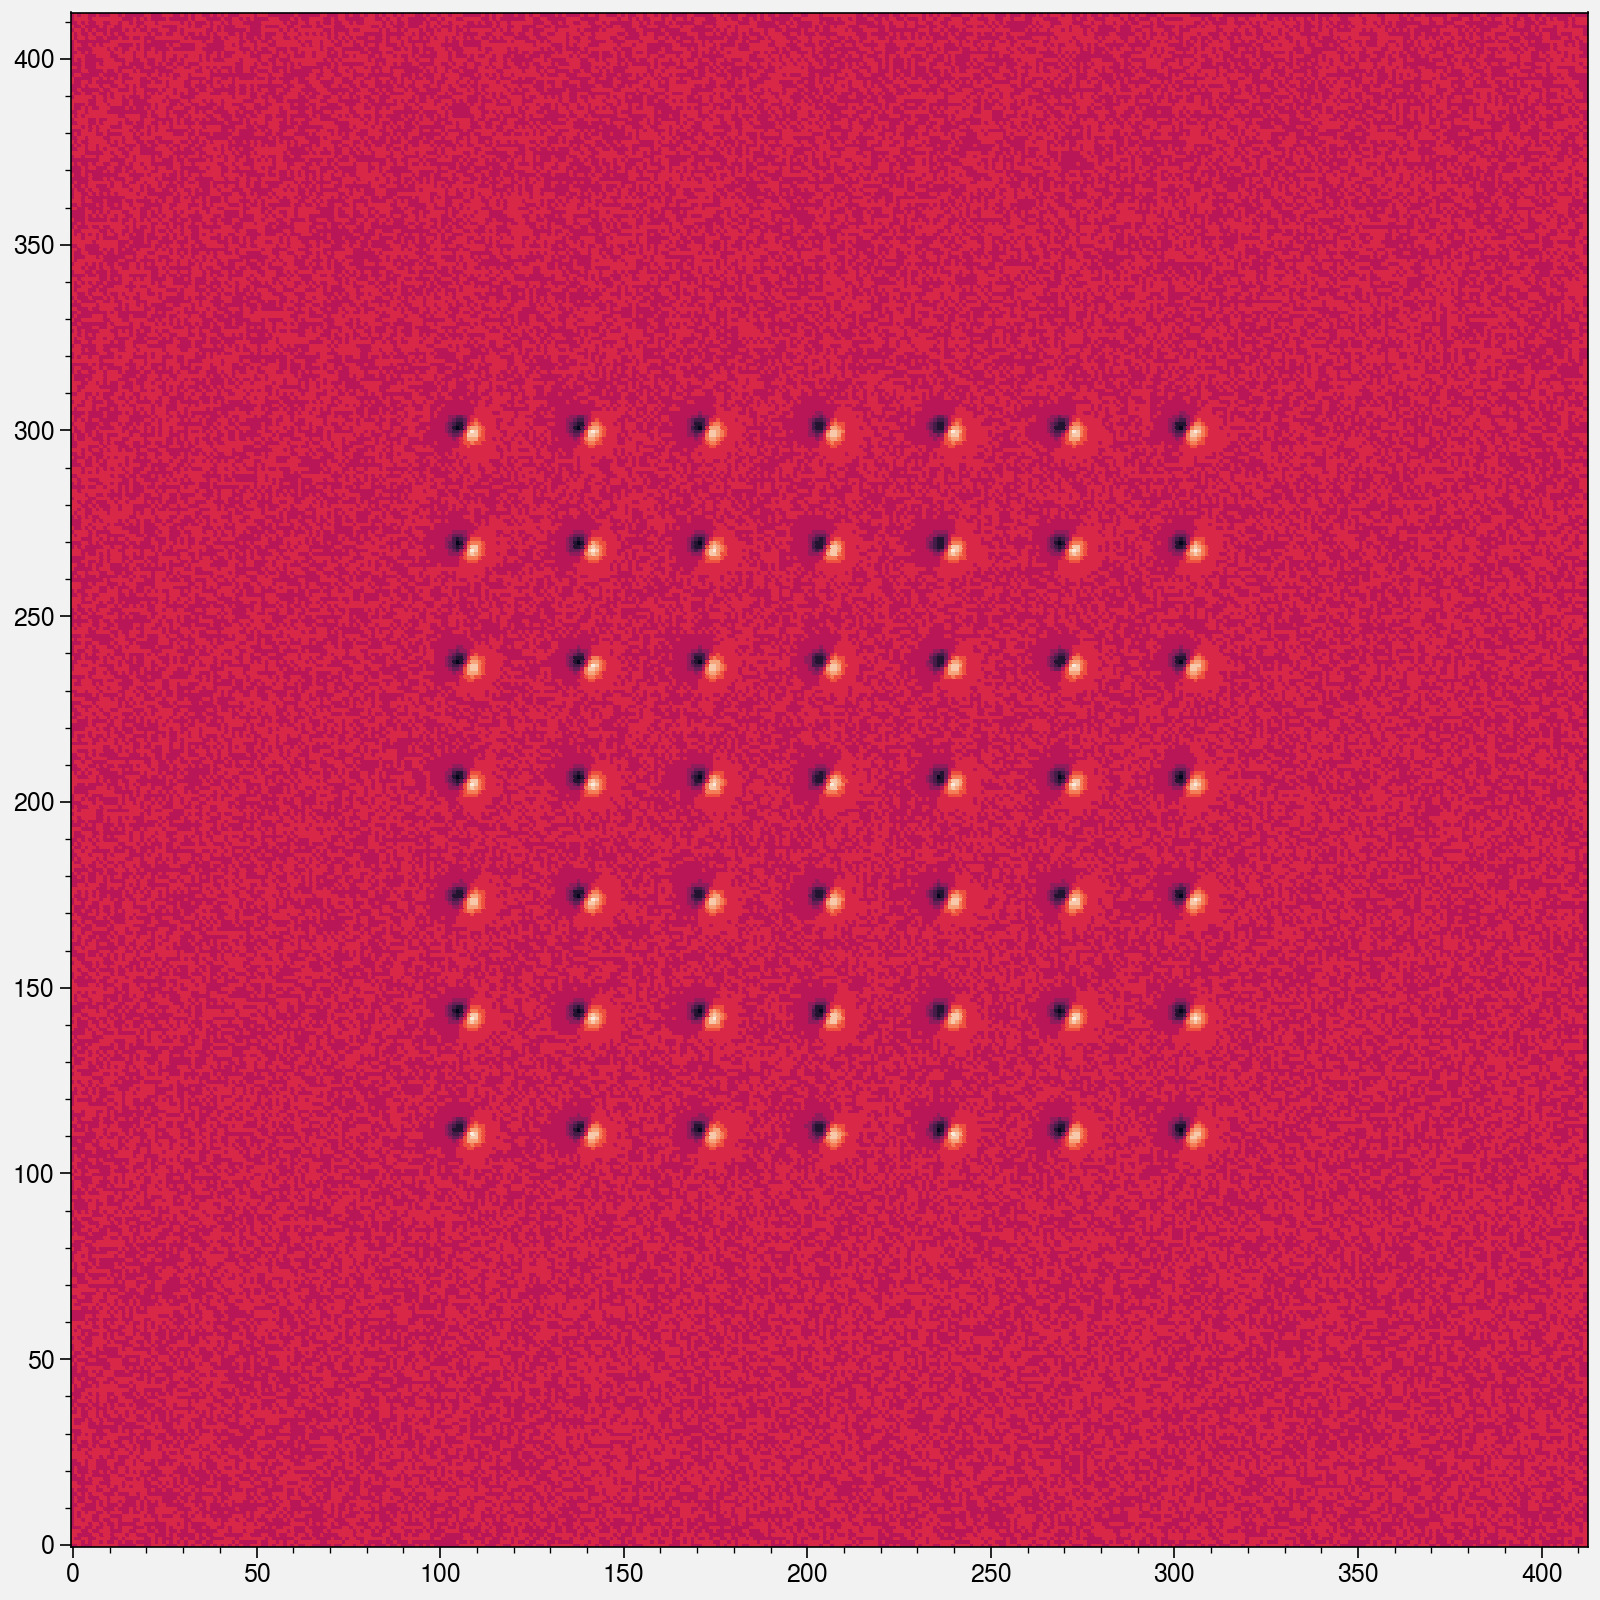

In [23]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(8, 8), share=0)
axs.pcolormesh(data["img"][0] - data["img"][1], cmap="rocket")

In [4]:
data["info"]

{'src_info': [{'magzp': 30.0,
   'scale': 1.0,
   'position_offset': 0,
   'affine_wcs_config': {'dudx': 0.263,
    'dudy': 0.0,
    'dvdx': 0.0,
    'dvdy': 0.263,
    'x0': 206.78159213659688,
    'y0': 205.00733250968761},
   'image_shape': [413, 413],
   'image_flags': 0,
   'galsim_psf_config': {'type': 'Gaussian',
    'fwhm': 0.9,
    'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}},
   'image_path': array([[-11.36610667,   1.35127928,  14.84527585, ..., -10.05874165,
             3.2756654 ,   5.79040125],
          [ -4.59935502,  -4.35826395,   5.36257573, ...,   6.23377557,
            11.98591482,  -3.08790629],
          [  9.70156659,   4.51034332, -10.62719124, ...,  -4.24932989,
            -1.76453666,  10.0677161 ],
          ...,
          [-11.20395803,  -3.62021928,  11.36414241, ...,  14.76330462,
             2.25269959,  14.90142244],
          [-15.32083218,   2.10438453,  -7.63534255, ...,  11.58288723,
            11.28012018,   6.21455714],
          [-17.481

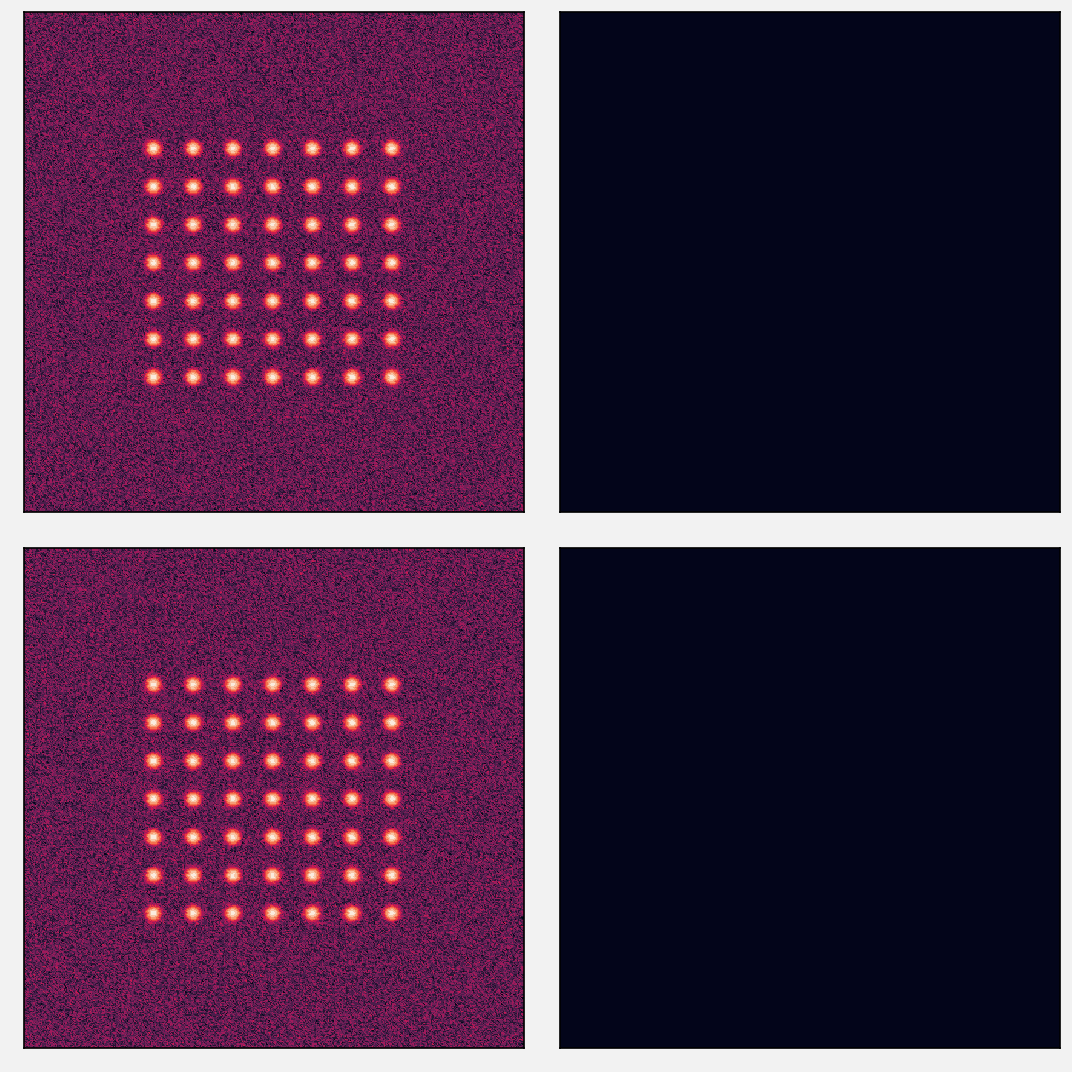

In [5]:
fig, axs = plot.subplots(nrows=len(data["img"]), ncols=2)

for i in range(len(data["img"])):
    
    axs[i, 0].pcolormesh(np.arcsinh(data["img"][i]*np.sqrt(data["wgt"][i])), cmap="rocket")
    axs[i, 0].set_aspect(1)
    axs[i, 0].xaxis.set_visible(False)
    axs[i, 0].yaxis.set_visible(False)
    axs[i, 1].pcolormesh(data["msk"][i], cmap="rocket")
    axs[i, 1].set_aspect(1)
    axs[i, 1].xaxis.set_visible(False)
    axs[i, 1].yaxis.set_visible(False)


INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for coadd/coadd
INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for epoch0/epoch0
INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for epoch1/epoch1
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:generating slice objects for ra,dec = 0.0|0.0
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:found possible image epoch0/epoch0


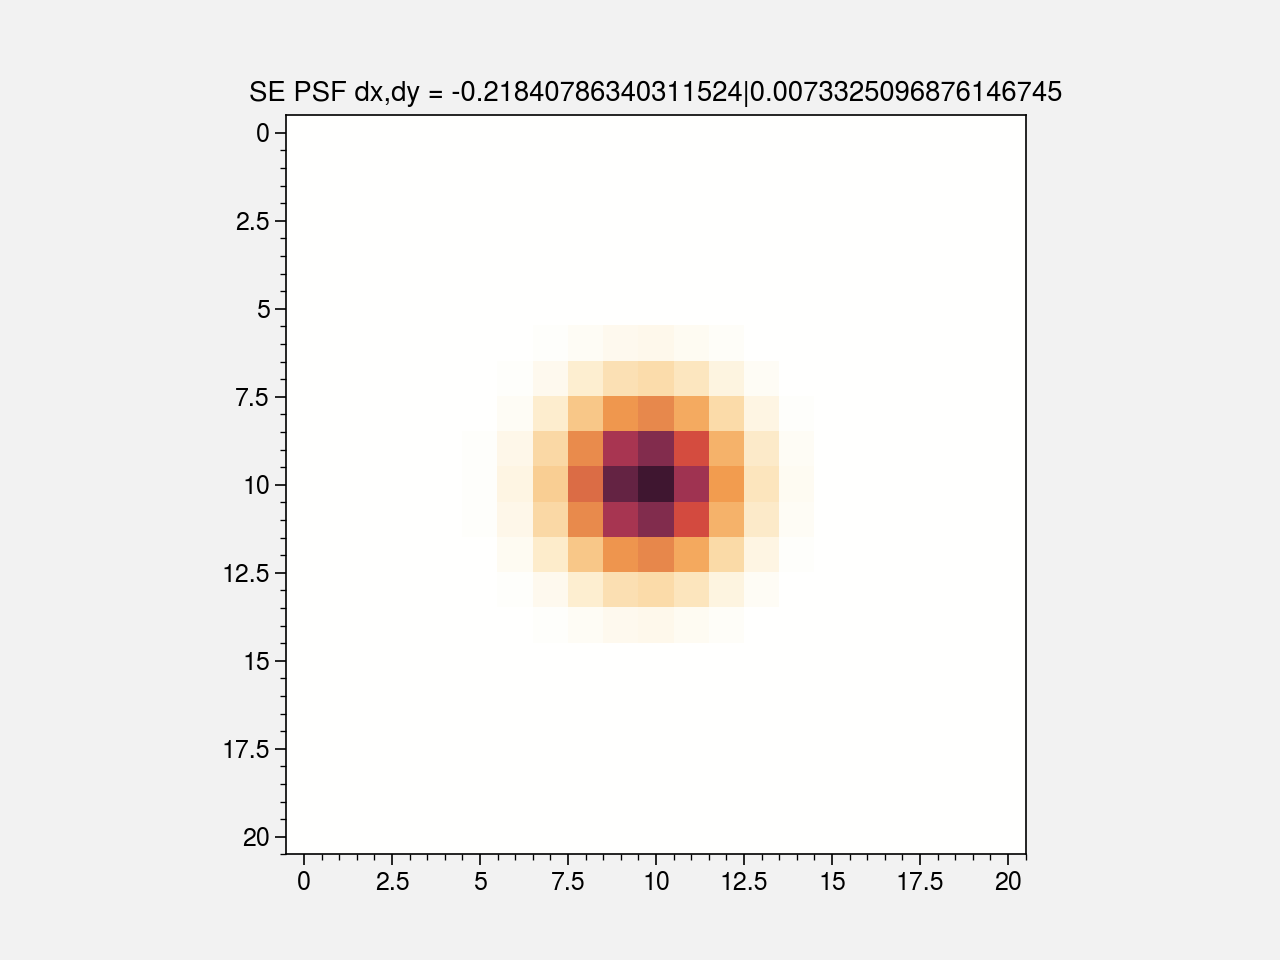

DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:found possible image epoch1/epoch1


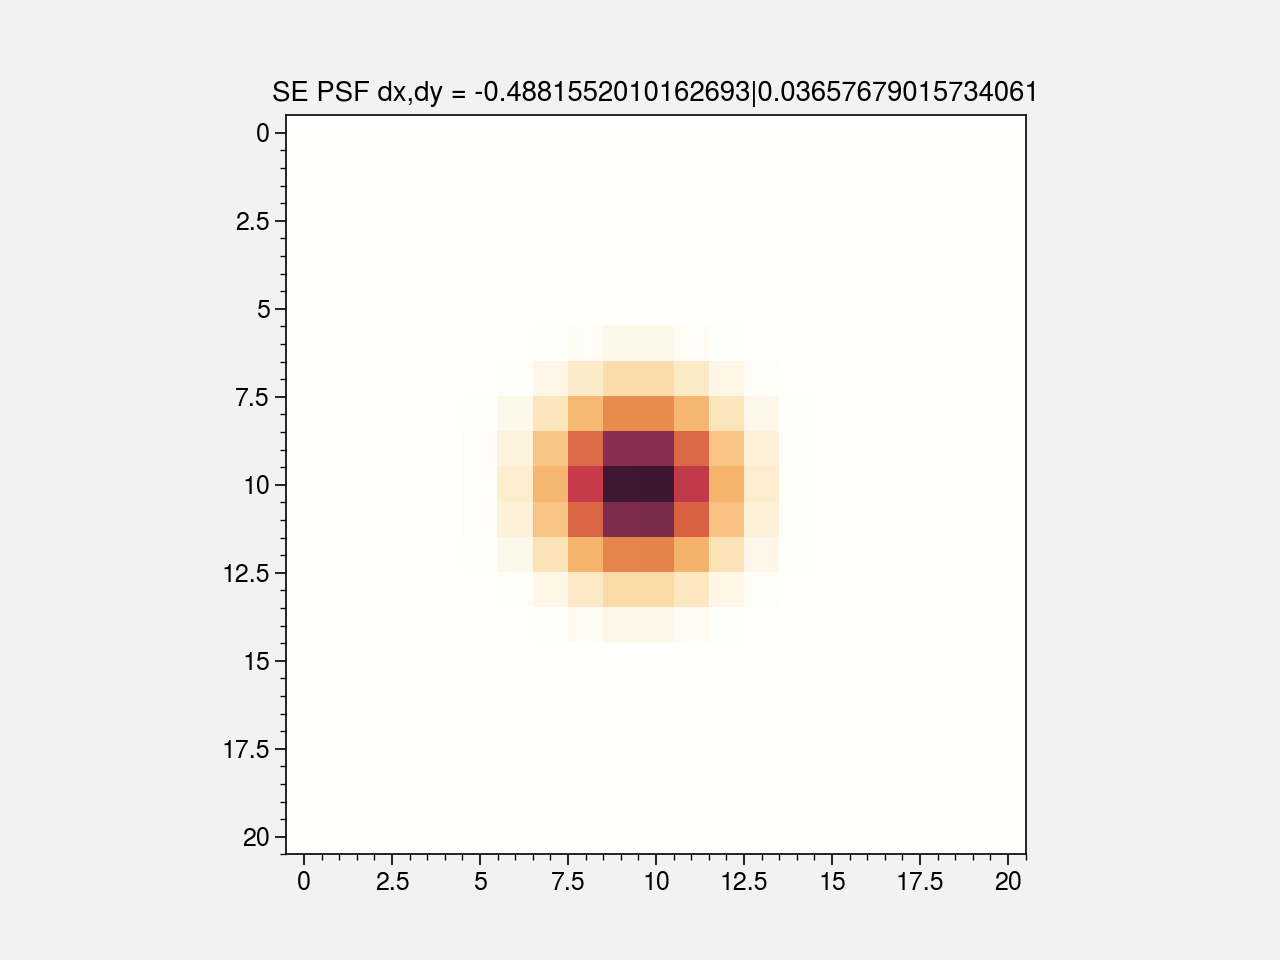

INFO:pizza_cutter.des_pizza_cutter._coadd_slices:images found in rough cut: 2
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:pre-proccseeing image epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:symmetrizing the masks
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:pre-proccseeing image epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:symmetrizing the masks
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:coadding weights: [0.5, 0.5]
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:resampling image epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs inverse cache miss for epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp took 7.340483 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs area interp cache miss for epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:SE wcs area interp took 0.049599 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs area interp cache miss for AffineWCS(dudx=0.263, dudy

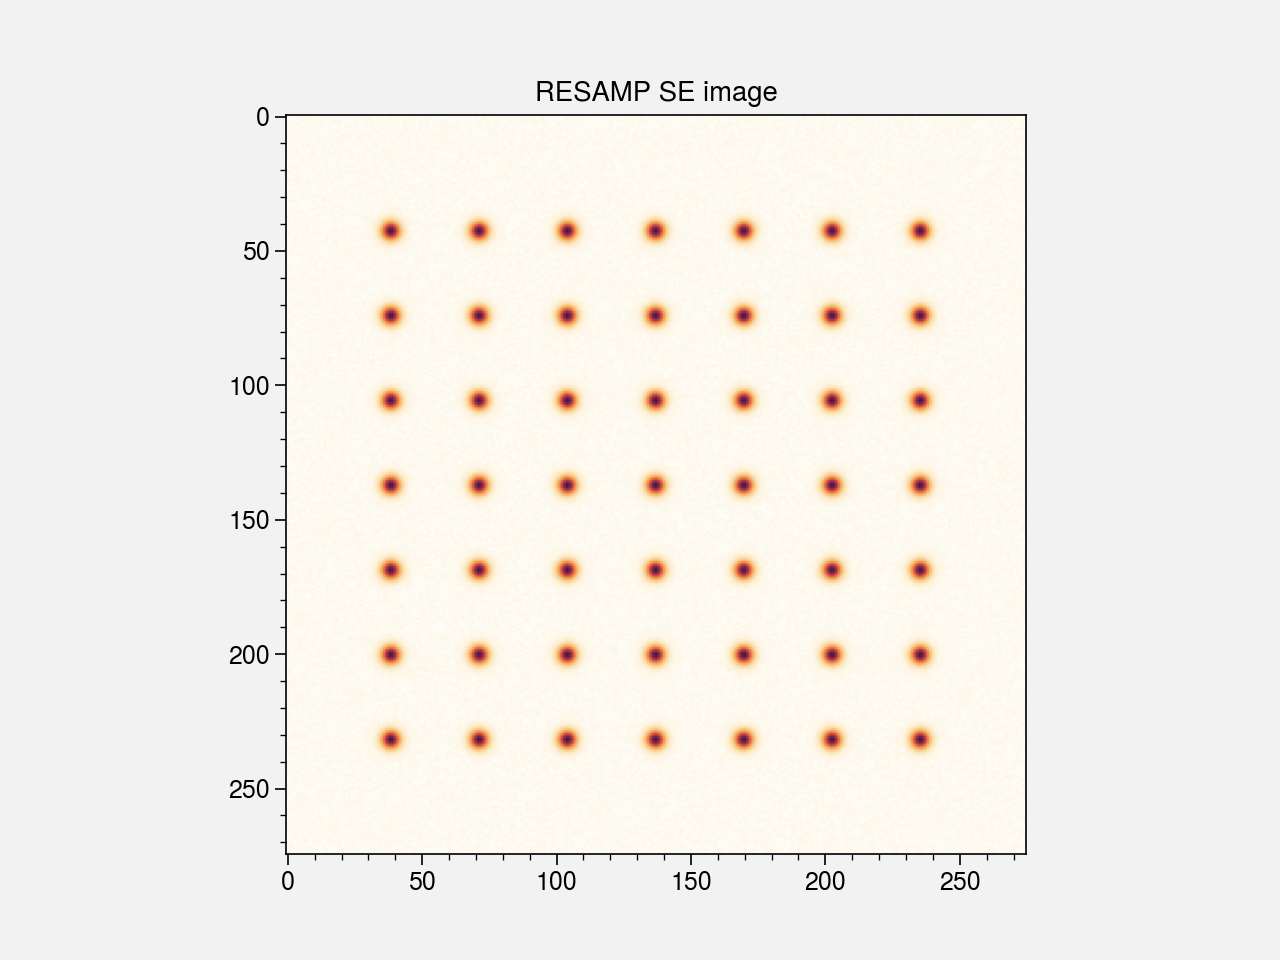

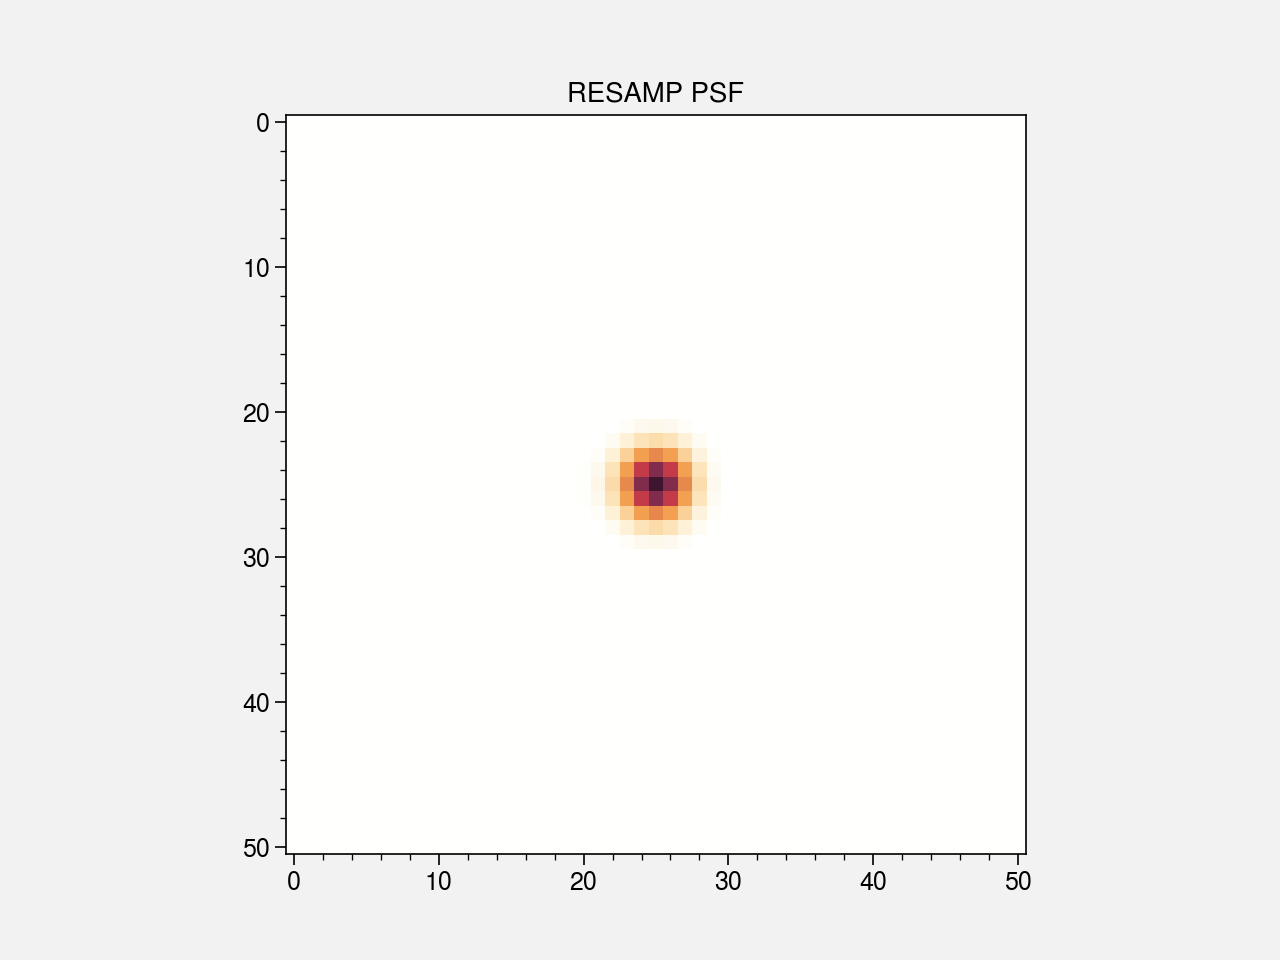

INFO:pizza_cutter.des_pizza_cutter._coadd_slices:resampling image epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs inverse cache miss for epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp took 7.512692 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs area interp cache miss for epoch1/epoch1
DEBUG:pizza_cutter.des_pizza_cutter._se_image:SE wcs area interp took 0.060525 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs area interp cache miss for AffineWCS(dudx=0.263, dudy=0, dvdx=0, dvdy=0.263, x0=137, y0=137)
DEBUG:pizza_cutter.des_pizza_cutter._se_image:coadd wcs area interp took 0.032531 seconds
(204.51184478454442, 206.03657678901186) 10 11


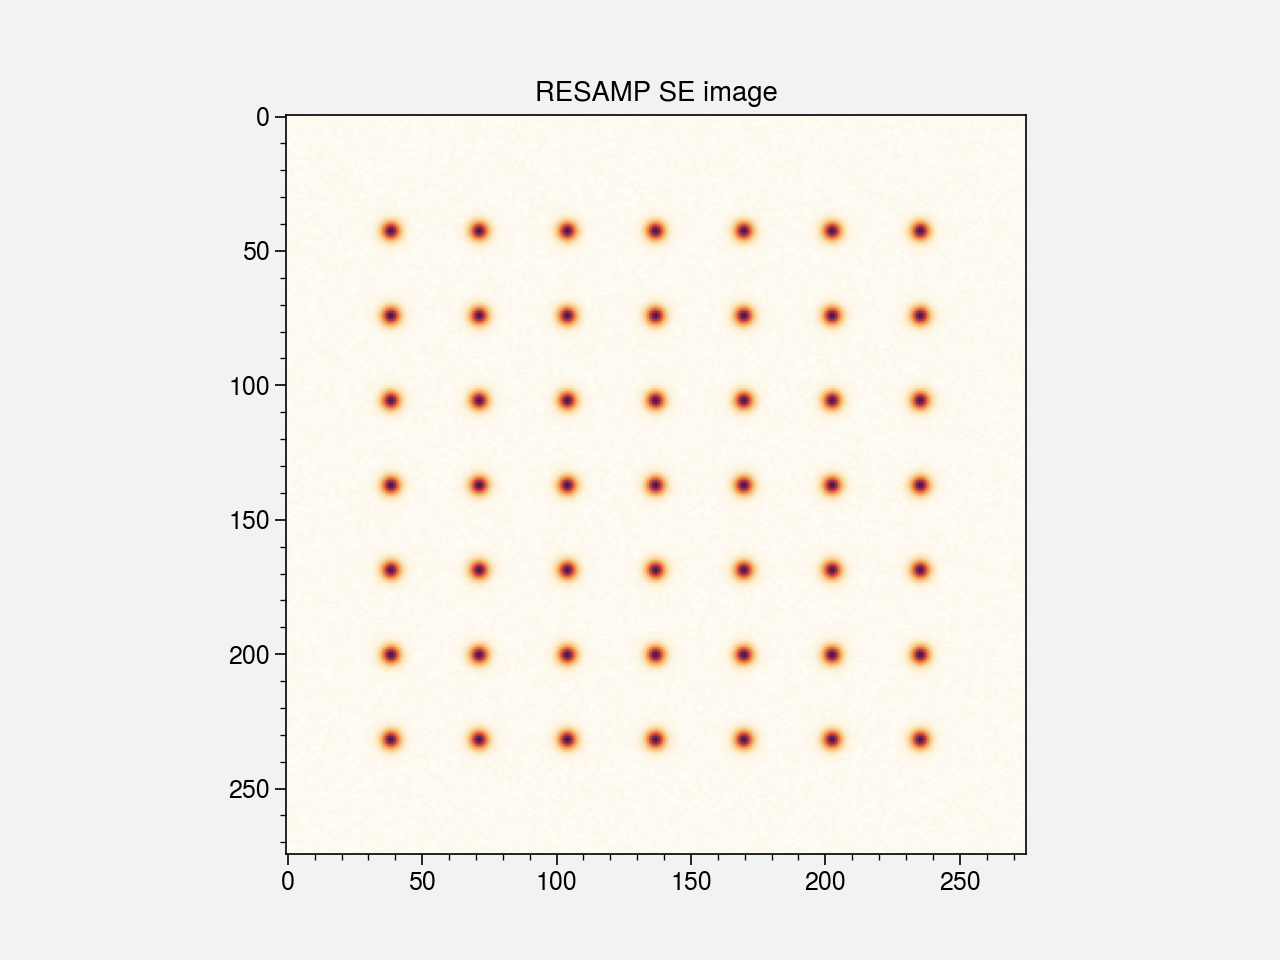

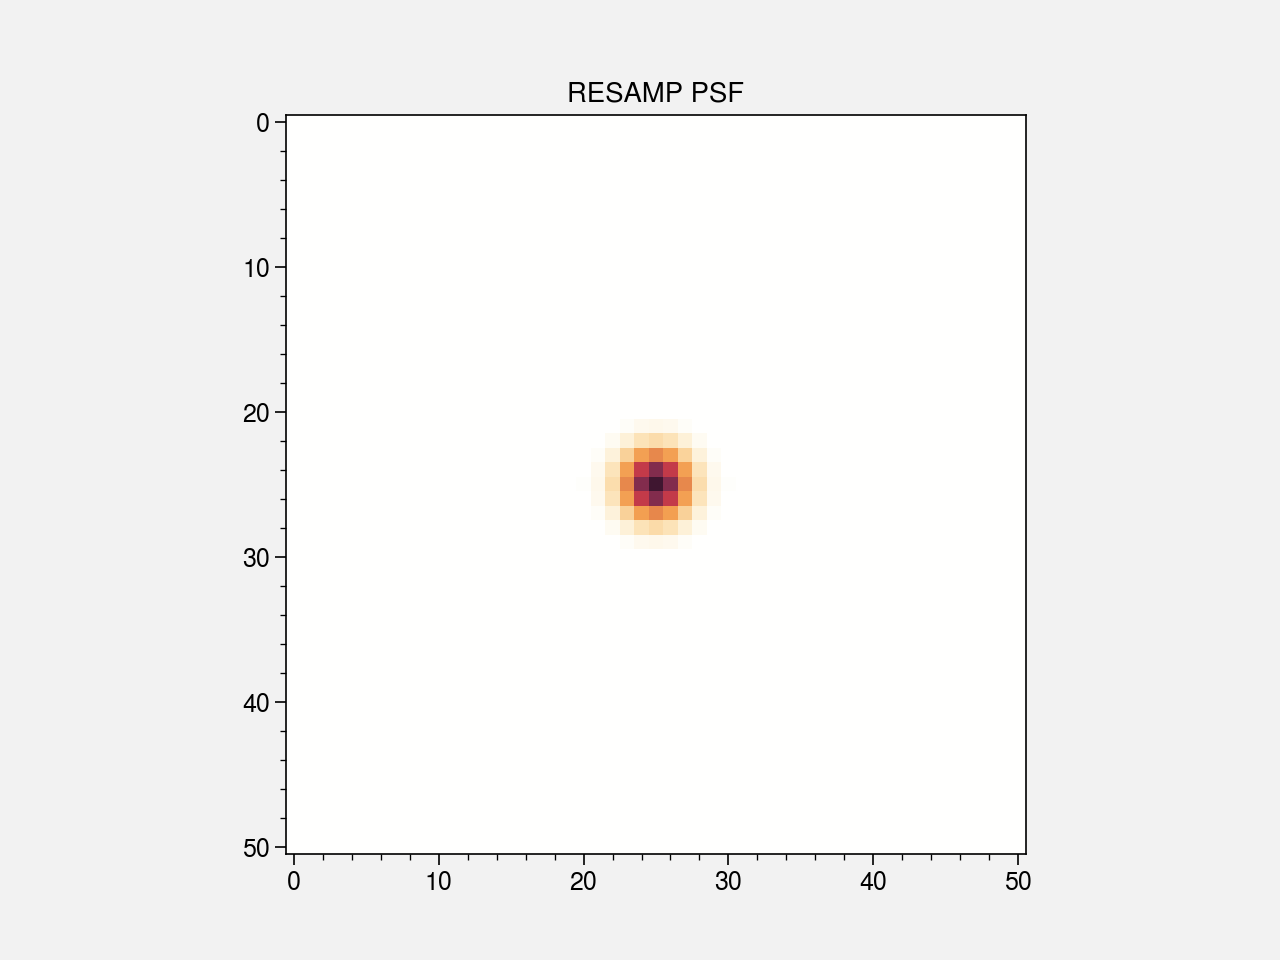

In [19]:
import tempfile
from pizza_cutter_sims.pizza_cutter import run_des_pizza_cutter_coadding_on_sim

coadd_rng = np.random.RandomState(seed=57)
with tempfile.TemporaryDirectory() as tmpdir:
    cdata = run_des_pizza_cutter_coadding_on_sim(
        rng=coadd_rng,
        tmpdir=tmpdir,
        single_epoch_config=cfg["pizza_cutter"]["single_epoch_config"],
        **data,
    )

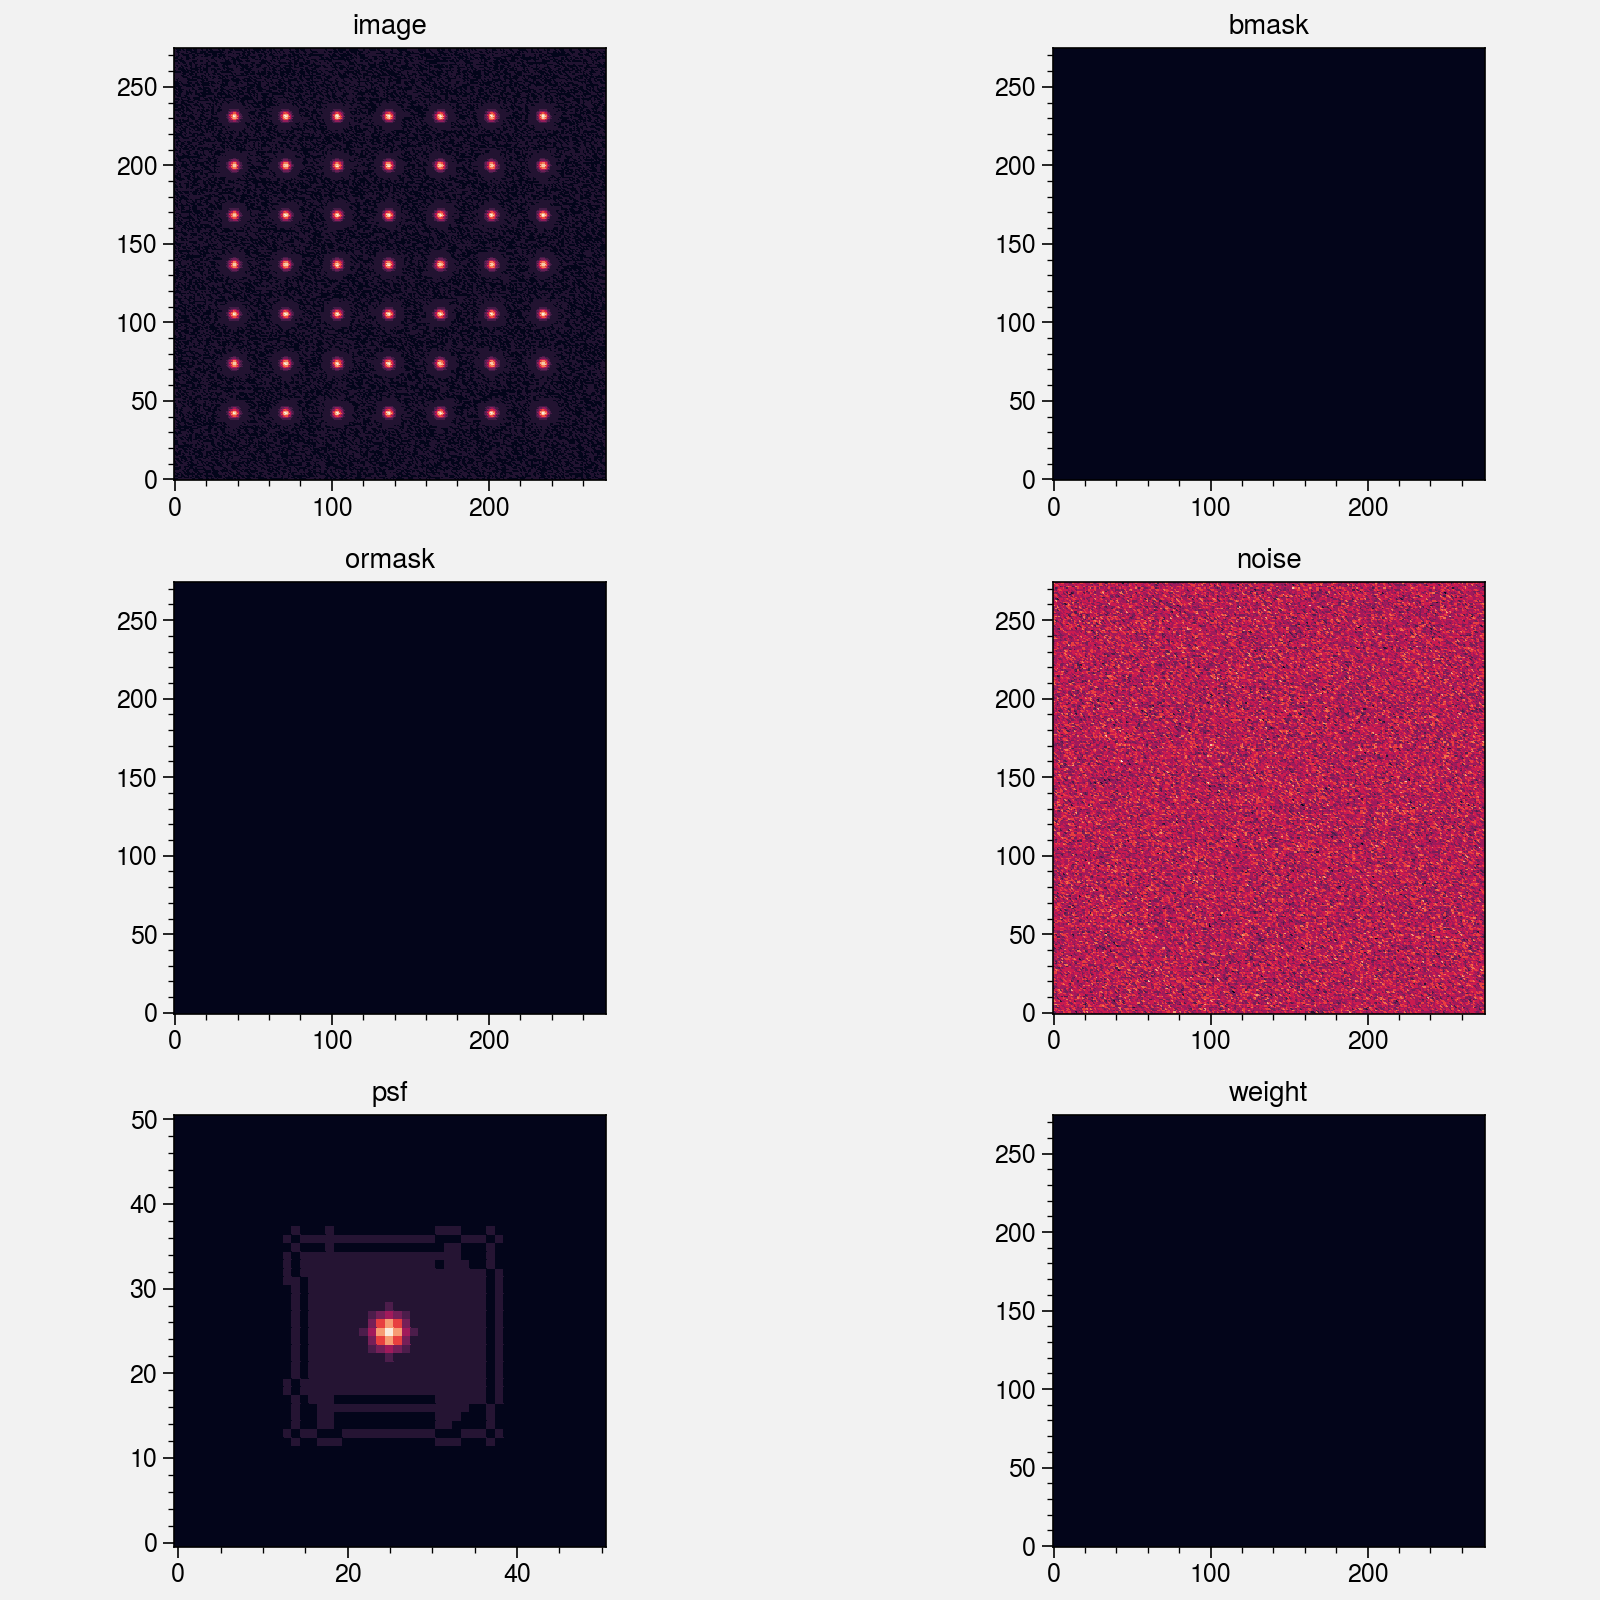

In [20]:
fig, axs = plot.subplots(nrows=3, ncols=2, figsize=(8, 8), share=0)

for i, key in enumerate(["image", "bmask", "ormask", "noise", "psf", "weight"]):
    
    axs[i].pcolormesh(cdata[key], cmap="rocket")
    axs[i].set_aspect(1)
    axs[i].set_title(key)


In [ ]:
cdata["psf"][:, 25]

In [ ]:
np.sum(cdata["psf"])

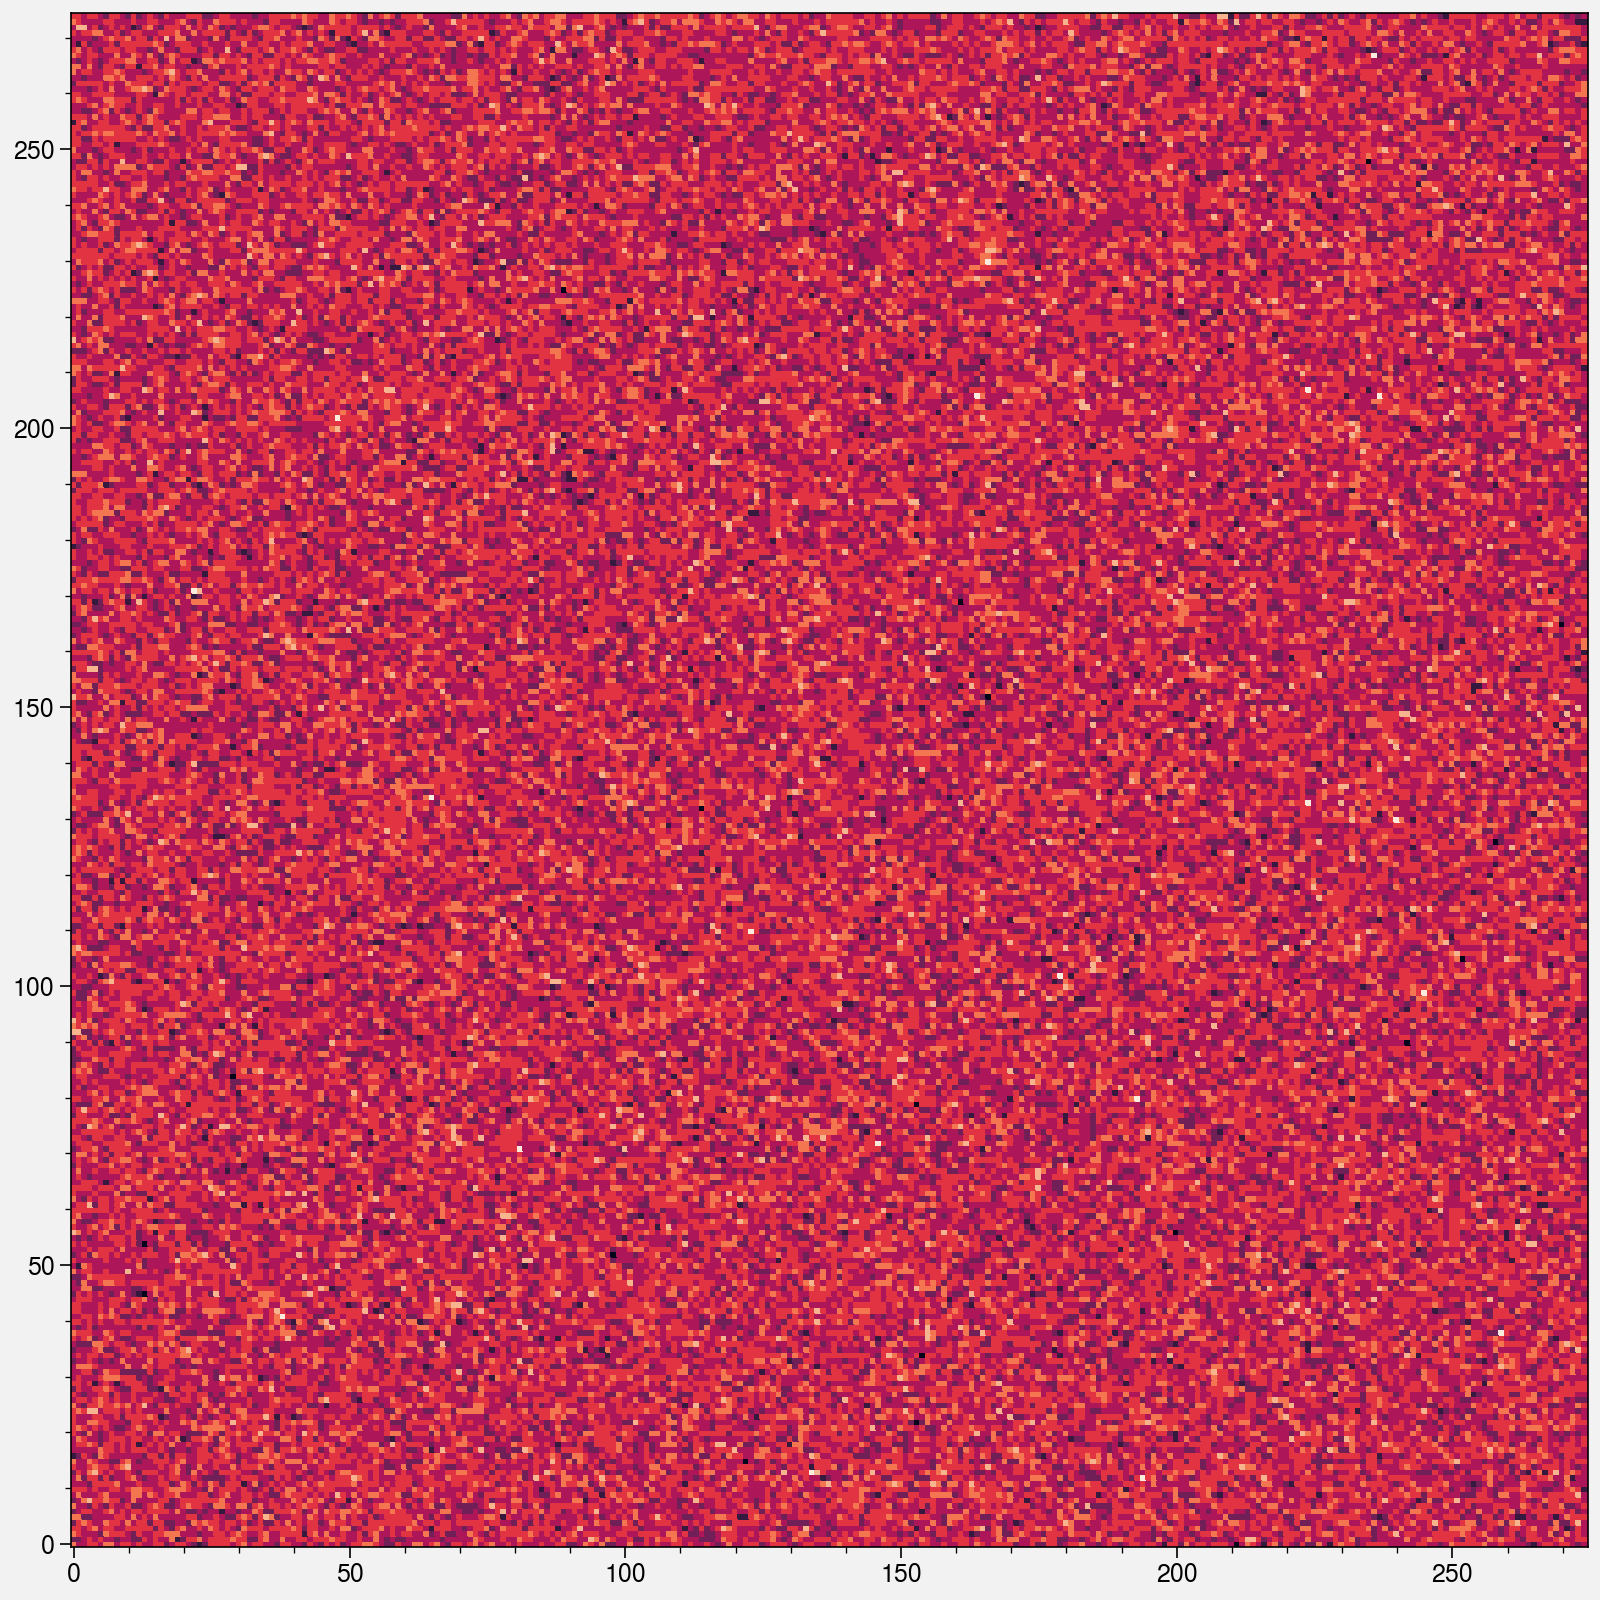

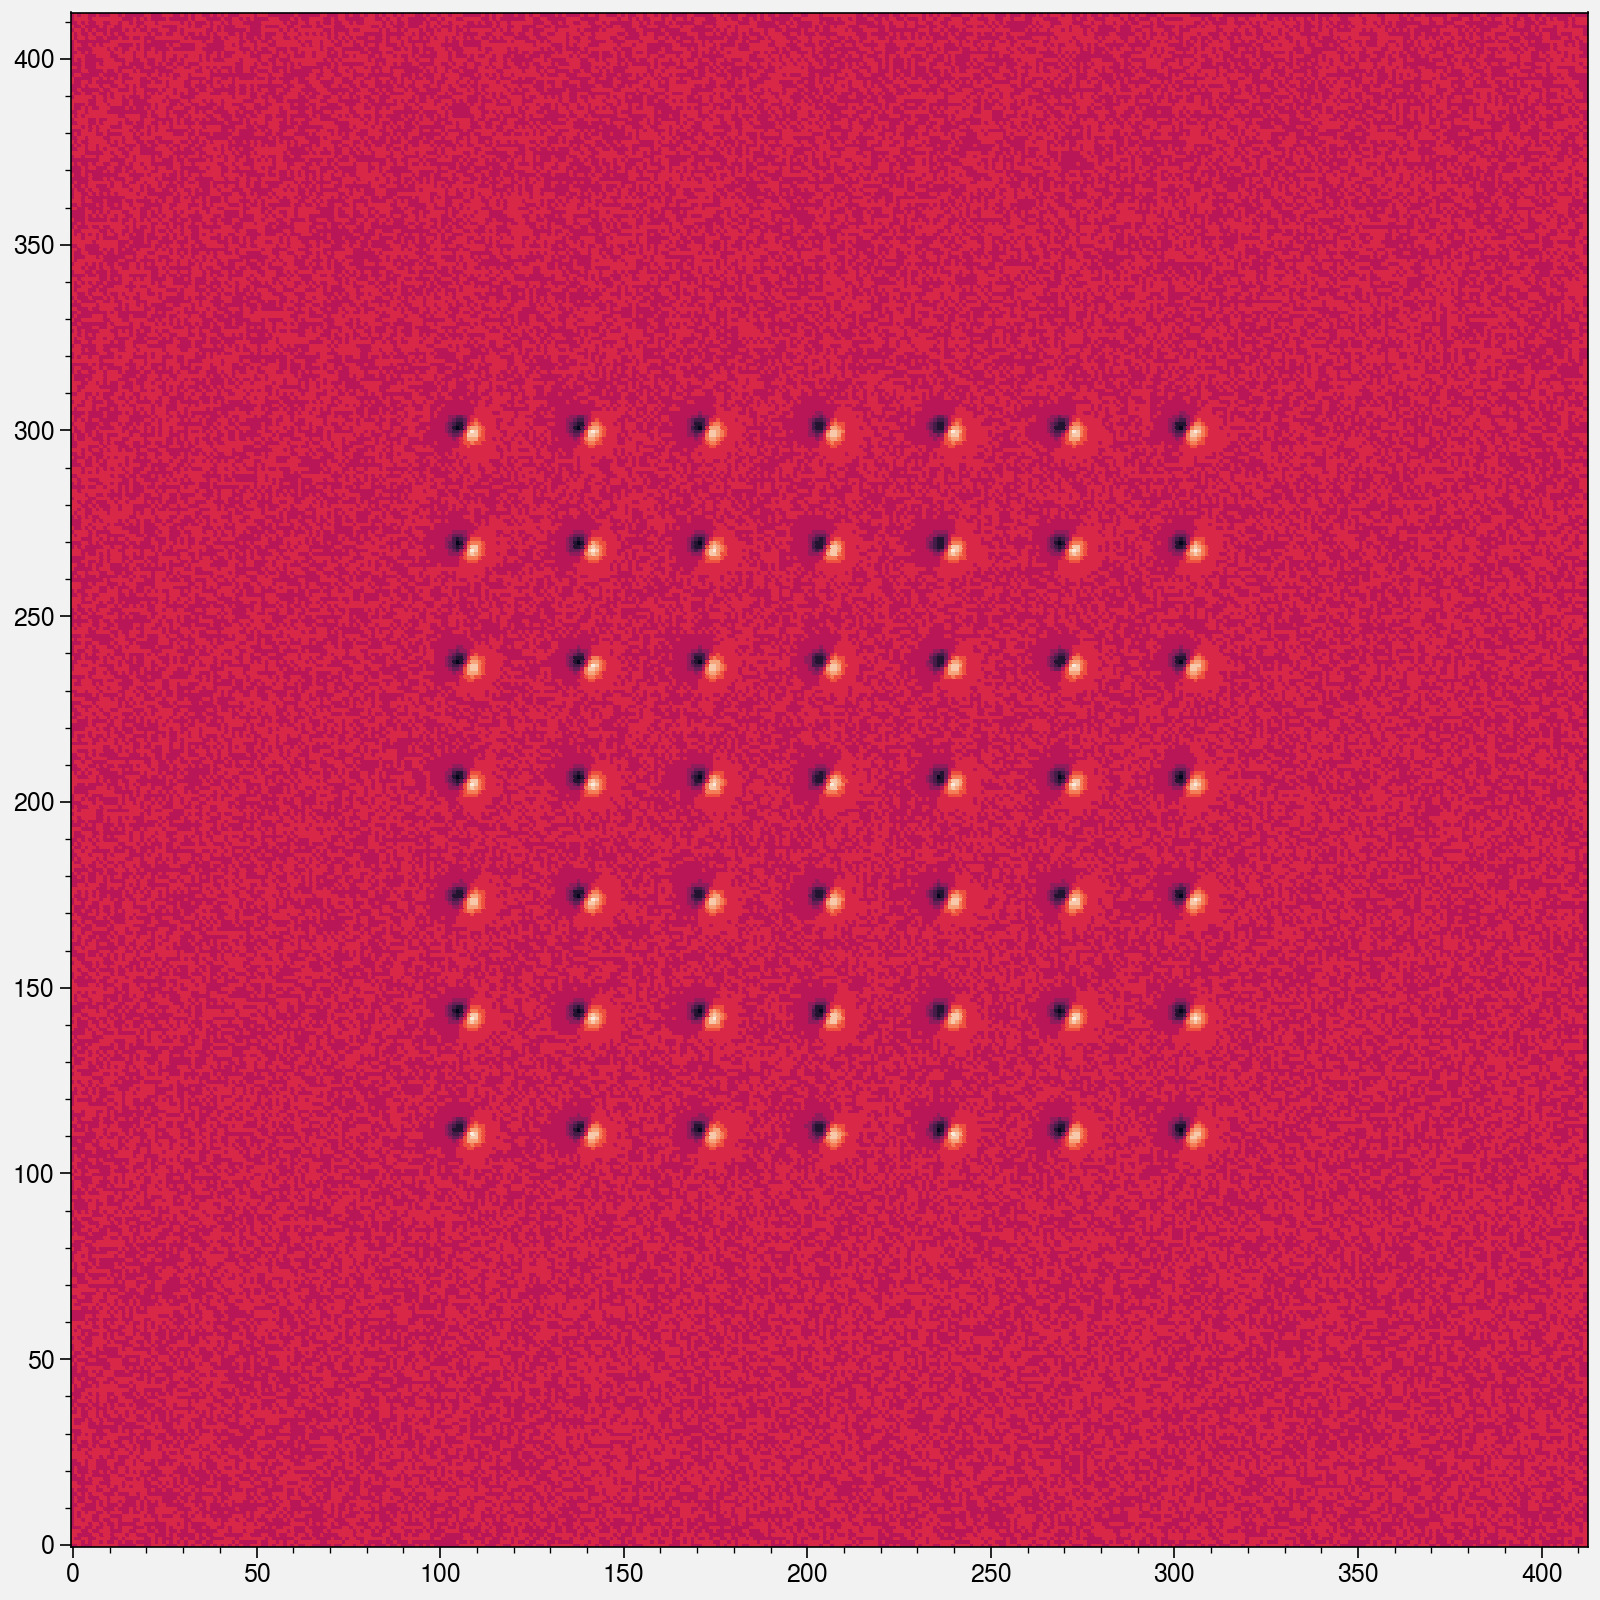

In [21]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(8, 8), share=0)

axs.pcolormesh(cdata["rsd"][0]["image"] - cdata["rsd"][1]["image"], cmap="rocket")

fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(8, 8), share=0)
axs.pcolormesh(data["img"][0] - data["img"][1], cmap="rocket")

In [13]:
data["img"]

[array([[-11.36610667,   1.35127928,  14.84527585, ..., -10.05874165,
           3.2756654 ,   5.79040125],
        [ -4.59935502,  -4.35826395,   5.36257573, ...,   6.23377557,
          11.98591482,  -3.08790629],
        [  9.70156659,   4.51034332, -10.62719124, ...,  -4.24932989,
          -1.76453666,  10.0677161 ],
        ...,
        [-11.20395803,  -3.62021928,  11.36414241, ...,  14.76330462,
           2.25269959,  14.90142244],
        [-15.32083218,   2.10438453,  -7.63534255, ...,  11.58288723,
          11.28012018,   6.21455714],
        [-17.4819474 ,  -0.05806902,   2.67998656, ...,   2.79274594,
          -6.79089823,  -3.69356167]]),
 array([[ 12.43253505,  14.49210102, -20.43638523, ...,   3.34537608,
          -3.28937058,   4.90723206],
        [ -9.21326604,  -7.91689076,  -4.2833638 , ...,  15.50352782,
          20.91294593, -21.90038364],
        [ -6.87128821,   7.77130448, -10.42205822, ...,   6.83125902,
           6.07378051,  -0.89659725],
        ...,
